In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.xception import Xception

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.preprocessing import image

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/cars/train.csv')
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [ ]:
train_image = []
for i in tqdm(train.index):
    img = image.load_img('/content/drive/MyDrive/cars/images/'+ train['image_names'][i], target_size=(350,350,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
tX = np.array(train_image)

100%|██████████| 1646/1646 [05:50<00:00,  4.69it/s]


No Emergency


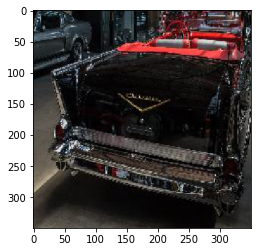

In [ ]:
num = 99
plt.imshow(tX[num])
if (train['emergency_or_not'][num] == 1):
    print('Emergency')
else:
    print('No Emergency')

In [ ]:
tY = train['emergency_or_not'].values

In [ ]:
X_train, val_x, y_train, val_y = train_test_split(tX, tY, test_size = 0.2, random_state = 13, stratify=tY)

In [ ]:
pre_trained_model = tf.keras.applications.Xception(input_shape = (350,350,3),
                               include_top = False,
                               weights = 'imagenet')

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 350, 350, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 174, 174, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 174, 174, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 174, 174, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
last_layer =  pre_trained_model.get_layer('add_11')
last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

In [ ]:
model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=500, validation_data=(val_x, val_y), batch_size=16)

Epoch 1/500
83/83 [==============================] - 29s 240ms/step - loss: 8.3281 - acc: 0.7595 - val_loss: 1.4231 - val_acc: 0.8364
Epoch 2/500
83/83 [==============================] - 19s 231ms/step - loss: 0.4363 - acc: 0.9305 - val_loss: 4.9666 - val_acc: 0.6030
Epoch 3/500
83/83 [==============================] - 19s 233ms/step - loss: 0.7084 - acc: 0.9382 - val_loss: 5.6008 - val_acc: 0.7364
Epoch 4/500
83/83 [==============================] - 20s 239ms/step - loss: 0.4635 - acc: 0.9508 - val_loss: 0.4164 - val_acc: 0.9636
Epoch 5/500
83/83 [==============================] - 20s 242ms/step - loss: 0.2592 - acc: 0.9791 - val_loss: 1.7742 - val_acc: 0.8909
Epoch 6/500
83/83 [==============================] - 20s 246ms/step - loss: 0.3214 - acc: 0.9781 - val_loss: 0.6386 - val_acc: 0.9606
Epoch 7/500
83/83 [==============================] - 21s 249ms/step - loss: 0.1789 - acc: 0.9895 - val_loss: 0.8136 - val_acc: 0.9515
Epoch 8/500
83/83 [==============================] - 21s 250ms

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/cars/test_vc2kHdQ.csv')
test.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [ ]:
test.index

RangeIndex(start=0, stop=706, step=1)

In [ ]:
test_image = []
for i in tqdm(test.index):
    img = image.load_img('/content/drive/MyDrive/cars/images/'+ test['image_names'][i], target_size=(350,350,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 706/706 [03:13<00:00,  3.65it/s]


In [ ]:
predictions = model.predict(test)

In [ ]:
#predictions

In [ ]:
a = np.floor(predictions)

In [ ]:
#a

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/cars/submission.csv')
submission['emergency_or_not'] = a

In [ ]:
submission.head()

,image_names,emergency_or_not
0,1960.jpg,0.0
1,668.jpg,1.0
2,2082.jpg,0.0
3,808.jpg,1.0
4,1907.jpg,0.0


In [ ]:
submission.to_csv('submission29.csv', index = False)

In [ ]:
model.save('M_95.21.h5')